# A5- Recommendation Systems
### Name:  `Jessica Li`

In this assignment, you’ll explore recommender systems -- aka, the technical name for systems underlying much of what drives personalization on the web. When it works well, it can help people find high-quality content that they want to consume. When it doesn’t, it can influence people in undesirable ways or lead them to engage with content longer

### Grading Overview and Rubric:

( 2 pts.) Got the MovieLens recommender system working.

( 2 pts.) Augmenting MovieLens Dataset

( 2 pts.) Test out the recommender as described

( 2 pts.) Built a Recommender for a New Dataset

( 4 pts.) Answers to Write-up Questions

Please turn your assignment in on Canvas -- Please turn in a .zip file of your Jupyter notebook and any supporting code, and a PDF print of your Jupyter notebook (including answers to the questions in your assignment).

## Part 1: A Recommender System Trial

For the first part of this assignment, go to YouTube and choose a topic that is both a reasonable one to want videos about, but also is one that some people may have developed outlandish theories about or which may be related to hateful opinions that some group has (e.g., you might choose a historic event like WWII or 9/11, an overview of a religion, or a video about Texas Senator Beto O’Rourke). Choose your own topic, not one of the ones suggested here. 

Note: You might want to create a new YouTube account for this part of the assignment, as a consequence of viewing content that you don’t necessarily care about, is that the recommender system underlying YouTube doesn’t necessarily know that you don’t care about it, and will factor in these views along with all the rest. Please note that you should be “logged in” while completing the assignment though, otherwise the recommendations may not carry forward quite as well.

Out of the returned list of suggestions, choose the video that you think most closely aligns to what someone searching for that topic would choose. From that point on, follow the recommendations that YouTube provides you 10 times. That is, click on the top recommended video on the list at the right (shown below).


#### For each video you choose, record a screenshot of the video preview in your document.

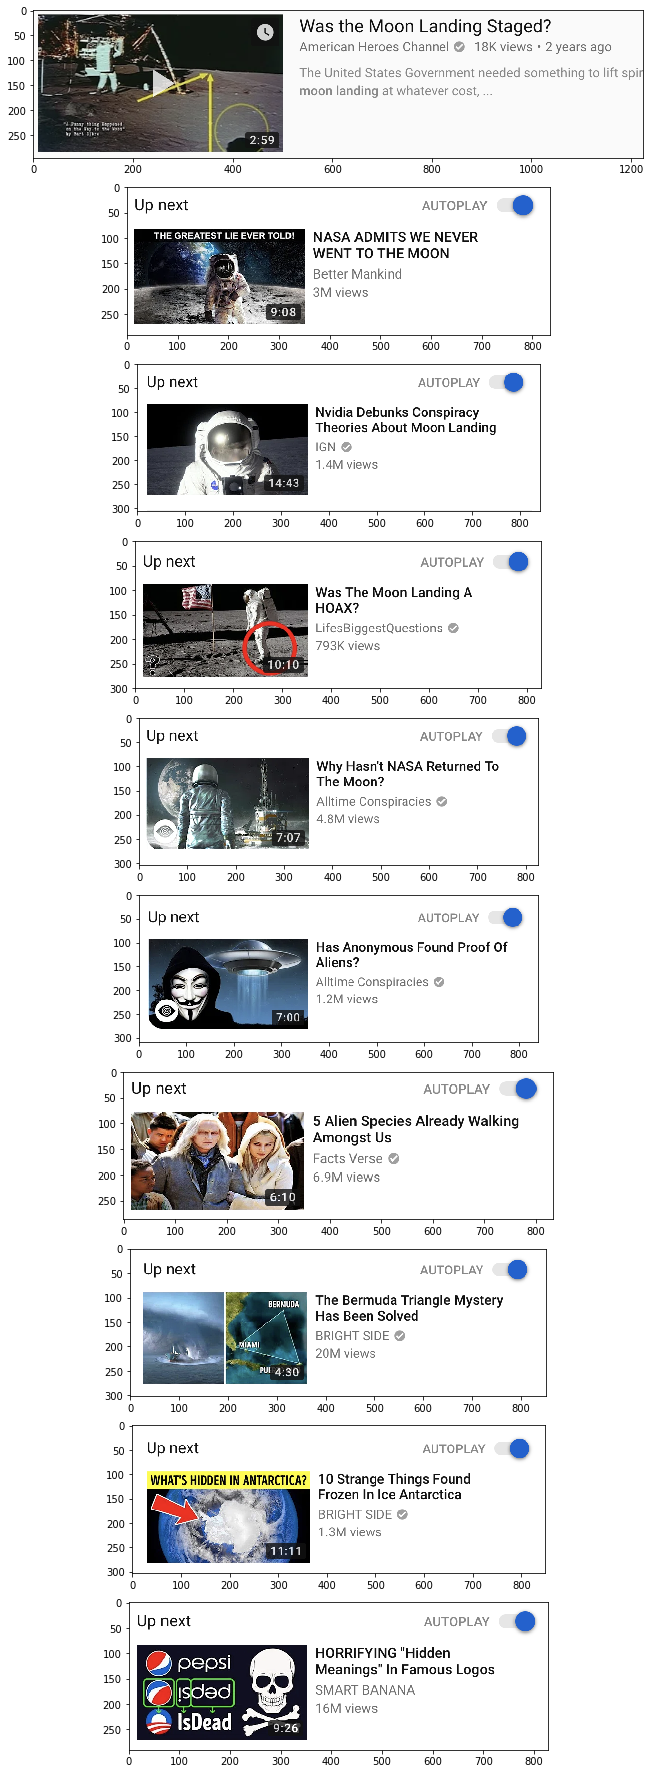

In [71]:
import glob
import pandas
import numpy as np
import itertools
import matplotlib.pyplot as plt
import csv
import PIL
from PIL import Image
import os

previewlist = glob.glob('preview_top_rec/*.png')
previewlist = sorted(previewlist)
previewimages = []

#make all the images into arrays and then append
for image in previewlist:
    img = Image.open(image)
    img_array = np.array(img)
    previewimages.append(img_array)
    
previewimages = np.array(previewimages)

#show all images
fig=plt.figure(figsize=(32, 32))
for i in range(1, 11):
    img = previewimages[i-1]
    fig.add_subplot(10,1, i)
    plt.imshow(img)

#### What do you notice about the videos? How does the topic change over time? Do you notice progressions toward more extreme views like those we read about?

## Part 2: Creating Recommendation System

In this section, you’ll create your own recommender system in Python.

There are a number of different recommender system libraries available. As usual, you are free to use anything you want, as long as you can complete the assignment. We’re going to use the Apple Turi Create Machine Learning library. It’s sort of like scikit, but has a number of interesting features for building models targeting Apple devices :)  It also happens to have a recommender system built in.

The first step is to build a recommender system using the MovieLens 20M movies dataset. You’ll find some documentation on how to do this on the Turi Create site: https://github.com/apple/turicreate.

In [2]:
### load data

import turicreate as tc

movies = tc.SFrame.read_csv('./ml-20m/movies.csv')
ratings = tc.SFrame.read_csv('./ml-20m/ratings.csv')

#print(movies)
#print(ratings)

Finished parsing file /Users/jessli/Documents/05-499/a5/ml-20m/movies.csv

Parsing completed. Parsed 100 lines in 0.054084 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/jessli/Documents/05-499/a5/ml-20m/movies.csv

Parsing completed. Parsed 27278 lines in 0.024177 secs.

Finished parsing file /Users/jessli/Documents/05-499/a5/ml-20m/ratings.csv

Parsing completed. Parsed 100 lines in 0.519123 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 2042753 lines. Lines per second: 2.73141e+06

Finished parsing file /Users/jessli/Documents/05-499/a5/ml-20m/ratings.csv

Parsing completed. Parsed 20000263 lines in 3.81679 secs.

In [3]:
### training the recommendation model

training_data, validation_data = tc.recommender.util.random_split_by_user(ratings, 'userId', 'movieId')
model = tc.recommender.create(training_data, 'userId', 'movieId')

Recsys training: model = item_similarity

Warning: Ignoring columns rating, timestamp;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 19970212 observations with 138493 users and 26657 items.

Data prepared in: 6.13468s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.667ms                        | 0.5        |

| 251.446ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.84s                               | 0                | 0               |

| 4.85s                               | 11.75            | 3152            |

| 7.87s                               | 24               | 6418            |

| 10.88s                              | 37.75            | 10066           |

| 13.90s                              | 51.5             | 13774           |

| 16.91s                              | 63.5             | 16943           |

| 19.93s                              | 75               | 20011           |

| 22.94s                              | 87.5             | 23352           |

| 28.47s                              | 100              | 26657           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 29.8735s

In [72]:
### example of recommendations by user
results = model.recommend()

In [5]:
### print out table of movie names based on the user (1)

user1 = results.filter_by(1,"userId")
print('Results for user: ' + '1 :\n')
print(user1)

rec_movieids = user1['movieId']
for id_m in rec_movieids:
    print(movies[movies['movieId'] == id_m], '\n')

#print('List of Movie Names in Rank Order: \n')
#print(sf)

Results for user: 1 :

+--------+---------+---------------------+------+
| userId | movieId |        score        | rank |
+--------+---------+---------------------+------+
|   1    |   1682  | 0.08991521086011614 |  1   |
|   1    |   2115  | 0.08436399459838867 |  2   |
|   1    |   1580  | 0.08341446842466081 |  3   |
|   1    |   1265  | 0.08248414584568568 |  4   |
|   1    |   1270  | 0.08045244319098337 |  5   |
|   1    |   1527  | 0.07804089614323208 |  6   |
|   1    |   3578  | 0.07723367997578212 |  7   |
|   1    |   2571  |  0.0769035005569458 |  8   |
|   1    |   5349  | 0.06858099971498761 |  9   |
|   1    |   3793  | 0.06804979290281023 |  10  |
+--------+---------+---------------------+------+
[10 rows x 4 columns]

+---------+-------------------------+---------------------+
| movieId |          title          |        genres       |
+---------+-------------------------+---------------------+
|   1682  | Truman Show, The (1998) | Comedy|Drama|Sci-Fi |
+---------+---

## Part 3: Augmenting and Testing Your Recommender System

For this section, you’ll exercise your recommender system a bit.

First, the dataset hasn’t been updated since 2015. Add 10 new movies to your version of the dataset.
Add yourself as a new user. Provide ratings for 20 movies (the 10 that you provided above and 10 more that you select).

Generate some recommendations for yourself.

For this part, you’ll generate 10 successive recommendations. After each, choose the top recommendation and update your user’s rating for it to be a highly-rated movie.

Record the movies that you added, and the top 5 ratings you got at each step.

How do you feel about the new ratings that you added? Do you think your recommendations improved as a result of the new movies being added?


In [66]:
ten_movies = []
last_line = ['138494','0','5.0','1255811158']

In [70]:
## import new data

## add 10 movies to movies dataset
## add 20 ratings to ratings dataset (10 on new movies added, 10 old)

#for i in range(10): 
## repeat process 10 times

movies_n = tc.SFrame.read_csv('./ml-20m/movies_w_new.csv')
ratings_n = tc.SFrame.read_csv('./ml-20m/ratings_w_new.csv')

## new data
training_data_n, validation_data_n = tc.recommender.util.random_split_by_user(ratings_n, 'userId', 'movieId')
model = tc.recommender.create(training_data_n, 'userId', 'movieId')

## get the recommendation
results = model.recommend(['138494'], k= 5)
print(results)

## prints + adds the recommendations
movie_titles = []
movie_ids = []
movie_rec_ids = results['movieId']

for id_m in movie_rec_ids:
    movie_ids.append(id_m)    
    movie_titles.append(movies[movies['movieId'] == id_m]['title'])
    ## print(movies[movies['movieId'] == id_m], '\n')
## print(movie_titles) <-- if want to see all the movies

## inserts new top recommendation to csv
newRow = "\n%s,%s,%s,%s" % (last_line[0], str(movie_ids[0]), last_line[2], str(int(last_line[3])+1))
last_line[3] = str(int(last_line[3])+1)

with open('./ml-20m/ratings_w_new.csv', 'a') as f:
    f.write(newRow)

## clears array for next run
del movie_ids[:]

## adds the 5 recommendations per round
ten_movies.append(movie_titles)
#print('Done Round: ', i )


Finished parsing file /Users/jessli/Documents/05-499/a5/ml-20m/movies_w_new.csv

Parsing completed. Parsed 100 lines in 0.041439 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/jessli/Documents/05-499/a5/ml-20m/movies_w_new.csv

Parsing completed. Parsed 27288 lines in 0.030264 secs.

Finished parsing file /Users/jessli/Documents/05-499/a5/ml-20m/ratings_w_new.csv

Parsing completed. Parsed 100 lines in 0.384191 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 2042753 lines. Lines per second: 3.01002e+06

Finished parsing file /Users/jessli/Documents/05-499/a5/ml-20m/ratings_w_new.csv

Parsing completed. Parsed 20000295 lines in 3.53948 secs.

Recsys training: model = item_similarity

Warning: Ignoring columns rating, timestamp;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 19971037 observations with 138494 users and 26717 items.

Data prepared in: 4.99077s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.458ms                        | 0.5        |

| 222.041ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.59s                               | 0                | 0               |

| 4.60s                               | 13               | 3503            |

| 7.62s                               | 25.5             | 6828            |

| 10.63s                              | 38               | 10177           |

| 13.65s                              | 50.25            | 13468           |

| 16.67s                              | 63.75            | 17089           |

| 19.68s                              | 77.25            | 20699           |

| 22.70s                              | 92.25            | 24697           |

| 26.87s                              | 100              | 26717           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 27.2378s

Done


In [68]:
### Ratings Per Each Step

for count in range(len(ten_movies)):
    step = ten_movies[count]
    print('Round:' , count+1)
    for rec in step:
        for i in range(len(rec)):
            k = i+1
            print('Title: ' , rec[i])
            

Round: 1
Title:  Dark Knight Rises, The (2012)
Title:  Guardians of the Galaxy (2014)
Title:  Django Unchained (2012)
Title:  Up (2009)
Title:  Source Code (2011)
Round: 2
Title:  Django Unchained (2012)
Title:  Guardians of the Galaxy (2014)
Title:  Looper (2012)
Title:  Source Code (2011)
Title:  Hunger Games, The (2012)
Round: 3
Title:  Looper (2012)
Title:  Guardians of the Galaxy (2014)
Title:  Skyfall (2012)
Title:  Hunger Games, The (2012)
Title:  Source Code (2011)
Round: 4
Title:  Skyfall (2012)
Title:  Hunger Games, The (2012)
Title:  Guardians of the Galaxy (2014)
Title:  Source Code (2011)
Title:  Hobbit: An Unexpected Journey, The (2012)
Round: 5
Title:  Hobbit: An Unexpected Journey, The (2012)
Title:  Hunger Games, The (2012)
Title:  Argo (2012)
Title:  Source Code (2011)
Title:  Guardians of the Galaxy (2014)
Round: 6
Title:  Hunger Games, The (2012)
Title:  Argo (2012)
Title:  X-Men: First Class (2011)
Title:  Source Code (2011)
Title:  Star Trek Into Darkness (2013)
R

#### How well do you think it does at predicting movies that you’d like? How would you improve it?

## Part 4: A Recommender System for a New Dataset

There are many different recommender datasets on the web. In this part, you’ll adapt and train a recommender algorithm for a new dataset that you find. It’s your choice what dataset to use, here are some examples: https://cseweb.ucsd.edu/~jmcauley/datasets.html

Once you’ve trained your dataset. Generate some recommendations using it.


In [73]:
## Create Recommendation System

beauty = tc.SFrame.read_csv('ratings_beauty.csv')
tdb, vdb = tc.recommender.util.random_split_by_user(beauty, 'UserId', 'ProductId')
model = tc.recommender.create(tdb, 'UserId', 'ProductId')


Finished parsing file /Users/jessli/Documents/05-499/a5/ratings_beauty.csv

Parsing completed. Parsed 100 lines in 0.79412 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 1286777 lines. Lines per second: 1.81465e+06

Finished parsing file /Users/jessli/Documents/05-499/a5/ratings_beauty.csv

Parsing completed. Parsed 2023070 lines in 0.918187 secs.

Recsys training: model = item_similarity

Warning: Ignoring columns Rating, Timestamp;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 2022659 observations with 1210124 users and 249257 items.

Data prepared in: 1.46513s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.105ms                        | 0          |

| 107.477ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 658.316ms                           | 0                | 0               |

| 1.20s                               | 100              | 249257          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.30342s

In [74]:
## example of recommendation
## get the recommendation

results = model.recommend(['A39HTATAQ9V7YF'], k= 5)
print(results)


+----------------+------------+-----------------------+------+
|     UserId     | ProductId  |         score         | rank |
+----------------+------------+-----------------------+------+
| A39HTATAQ9V7YF | B006GQTZ8A |  0.016304343938827515 |  1   |
| A39HTATAQ9V7YF | B006GQG9GQ |  0.010204076766967773 |  2   |
| A39HTATAQ9V7YF | B006OZF74O |  0.008064523339271545 |  3   |
| A39HTATAQ9V7YF | B00CF2VUVE | 0.0075757503509521484 |  4   |
| A39HTATAQ9V7YF | B006J5V9IC |  0.006849318742752075 |  5   |
+----------------+------------+-----------------------+------+
[5 rows x 4 columns]



In [76]:
## Actual Items
recommends = ['REVLON Colorburst Lip Butter, Berry Smoothie, 0.09 Ounce',
              'REVLON Colorburst Lip Butter, Pink Truffle, 0.09 Ounce',
              'REVLON Colorburst Lip Butter, Tutti Frutti, 0.09 Ounce',
              'Revlon Lash Potion By Grow Luscious Waterproof Volume and Length Mascara, Blackest Black, 0.34 Ounce',
              'real Techniques Shading Brush (Pack of 2)'
             ]
print('RECOMMENDATIONS: ')
for item in recommends:
    print('\n%s' %(item))


RECOMMENDATIONS: 

REVLON Colorburst Lip Butter, Berry Smoothie, 0.09 Ounce

REVLON Colorburst Lip Butter, Pink Truffle, 0.09 Ounce

REVLON Colorburst Lip Butter, Tutti Frutti, 0.09 Ounce

Revlon Lash Potion By Grow Luscious Waterproof Volume and Length Mascara, Blackest Black, 0.34 Ounce

real Techniques Shading Brush (Pack of 2)


####  For your dataset, what are good features for making recommendations?  How well does the recommender work now? What would you do to improve it?